### Calculating the Modified Additive Manufacturing Suitability Factor
This Jupyter notebook demonstrates the calculation of the Modified Additive Manufacturing Suitability Factor for three different powders.

<b> If you use this notebook, please refer to the following papers: </b> 
1. A. Yankin, H.A. Murtaza, A. Ospanov, G. Zharkynbekova, D. Yuldasheva, A. Perveen, D. Talamona, "Comprehensive analysis of ultrasonically atomized 316L stainless steel powder using adjusted additive manufacturing suitability factor," Powder Technology, vol. 444, 2024, p. 120004. https://doi.org/10.1016/j.powtec.2024.120004

2. [Add reference here] 

In [49]:
# Loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import ChainMap

First, import the data using the `read_csv()` function from the pandas library.

In [2]:
# DataFrame from a 'xlsx' file 
df = pd.read_excel('AMSF.xlsx', sheet_name='AMSF').iloc[:9,:8]
df.head()

,Samples,CI,PD,AE,c,BF,SE,CBD
0,Powder_1,3.7,5.6,6.0,0.11,413.0,1.4,4.4
1,Powder_1,3.5,5.5,9.7,0.21,425.0,1.3,4.3
2,Powder_1,3.6,5.7,6.9,0.10,471.0,1.4,4.4
3,Powder_2,2.1,6.0,8.5,0.18,628.0,2.2,4.1
4,Powder_2,2.2,5.8,7.1,0.23,645.0,2.1,4.0


Next, calculate the multiplicative inverse of the 'CBD' column.

In [3]:
df['1/CBD'] = 1/df.CBD
df.head()

,Samples,CI,PD,AE,c,BF,SE,CBD,1/CBD
0,Powder_1,3.7,5.6,6.0,0.11,413.0,1.4,4.4,0.227273
1,Powder_1,3.5,5.5,9.7,0.21,425.0,1.3,4.3,0.232558
2,Powder_1,3.6,5.7,6.9,0.10,471.0,1.4,4.4,0.227273
3,Powder_2,2.1,6.0,8.5,0.18,628.0,2.2,4.1,0.243902
4,Powder_2,2.2,5.8,7.1,0.23,645.0,2.1,4.0,0.250000


Then, normalize the data by dividing each value by the maximum value in its column.

In [4]:
df_norm = df.iloc[:,1:]/df.max()[1:]
df_norm.head()

,CI,PD,AE,c,BF,SE,CBD,1/CBD
0,1.0,0.933333,0.472441,0.478261,0.622926,0.636364,1.0,0.886364
1,0.945946,0.916667,0.76378,0.913043,0.641026,0.590909,0.977273,0.906977
2,0.972973,0.95,0.543307,0.434783,0.710407,0.636364,1.0,0.886364
3,0.567568,1.0,0.669291,0.782609,0.94721,1.0,0.931818,0.95122
4,0.594595,0.966667,0.559055,1.0,0.972851,0.954545,0.909091,0.975


4th step: Apply a logarithmic transformation to each value in DataFrame

In [5]:
df_log = np.log10(df_norm.astype(np.float64))
df_log

,CI,PD,AE,c,BF,SE,CBD,1/CBD
0,0.000000,-0.029963,-0.325652,-0.320335,-0.205563,-0.196295,0.000000,-0.052388
1,-0.024134,-0.037789,-0.117032,-0.039509,-0.193125,-0.228479,-0.009984,-0.042404
2,-0.011899,-0.022276,-0.264955,-0.361728,-0.148493,-0.196295,0.000000,-0.052388
3,-0.245982,0.000000,-0.174385,-0.106455,-0.023554,0.000000,-0.030669,-0.021719
4,-0.225779,-0.014723,-0.252545,0.000000,-0.011954,-0.020203,-0.041393,-0.010995
5,-0.312929,-0.037789,-0.010382,-0.361728,0.000000,-0.041393,-0.041393,-0.010995
6,-0.225779,-0.259637,-0.031922,-0.247784,-0.216208,-0.111974,-0.030669,-0.021719
7,-0.206474,-0.273001,-0.099482,-0.082974,-0.159701,-0.063669,-0.041393,-0.010995
8,-0.225779,-0.286790,0.000000,-0.157608,-0.157813,-0.087150,-0.052388,0.000000


Next, calculate mean values and standard deviations for each powder.

In [51]:
df_log_dr = df_log.drop(columns=['CBD']) # Drop the 'CBD' column from df_log and assign to df_log_dr
df_log_dr['Samples'] = df.Samples.values # Add 'Samples' column from original DataFrame df to df_log_dr

# Calculate mean values and standard deviations for each powder
df_mean = df_log_dr.groupby('Samples').agg('mean')
df_std = df_log_dr.groupby('Samples').agg('std')

6th step: Calculate AMSF values and their standard deviations for each powder.

In [53]:
# Define weighting factors for each parameter
weights = pd.Series([0.1, 0.1, 0.02, 0.02, 0.11, 0.11, 0.54], index=['CI','PD','AE','c','BF','SE','1/CBD'])

# Calculate weighted mean values for each powder
AMS_log = df_mean.dot(weights)

# Calculate weighted standard deviations for each powder
AMS_log_std = ((df_std**2).dot(weights**2))**0.5

# Calculate the score as 10 raised to the power of 'AMS_log'
Score = 10**AMS_log

res = pd.concat([AMS_log, AMS_log_std, Score], axis=1).rename(columns=ChainMap({0:'AMS_log'}, {1:'AMS_log_std'}, {2:'Score'}))
res

,AMS_log,AMS_log_std,Score
Samples,,,
Powder_1,-0.083058,0.006612,0.825927
Powder_2,-0.045372,0.007900,0.900800
Powder_3,-0.088475,0.007850,0.815690


Finally, create a bar chart to visualize the results.

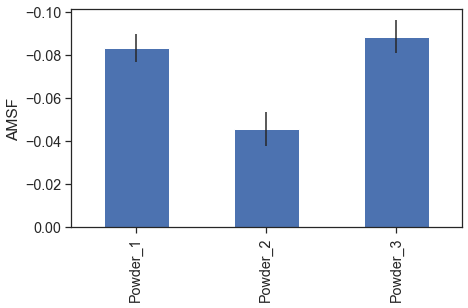

In [48]:
sns.set(font_scale=1.3)
sns.set_style("ticks")

fig = res.plot(kind = "bar", figsize=(7, 4), y = "AMS_log", legend = False, yerr = "AMS_log_std").invert_yaxis()

plt.xlabel("")
plt.ylabel("AMSF")

plt.savefig('Fig.png', bbox_inches='tight', dpi=600)

<b> If you use this notebook, please refer to the following papers: </b> 
1. A. Yankin, H.A. Murtaza, A. Ospanov, G. Zharkynbekova, D. Yuldasheva, A. Perveen, D. Talamona, "Comprehensive analysis of ultrasonically atomized 316L stainless steel powder using adjusted additive manufacturing suitability factor," Powder Technology, vol. 444, 2024, p. 120004. https://doi.org/10.1016/j.powtec.2024.120004

2. [Add reference here] 